# Part 1: Loading data and packages

## Understanding the data

In [140]:
#First let's bring in the dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

PublicData = pd.read_csv("SurveyQuantitativeData_Downloaded_050820_1240PM.csv")
PublicData.head()

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
count_nan = PublicData.isna().sum(axis = 0)
count_nan

SubmissionDate        0
starttime             0
endtime               0
duration              0
consent               0
age                 158
gender               39
degree               40
international        42
closure_cam          45
closure_res          58
closure_date         48
location             41
location_perm        45
living               42
vulnerable           42
quarantine           44
experienced         345
dis_label           867
dis_healthcare       70
dis_internet         72
dis_academic         75
dis_social           76
dis_psych            76
change              867
fin_exp              63
fin_inc              68
fin_aid              88
fin_debt             87
exp_type            718
exp_more            761
exp_less            615
inc_more            858
inc_less            692
aid_more            861
aid_less            832
debt_more           805
debt_less           855
inst_response        56
anx_label           867
anx_nextmo           73
anx_summer      

In [141]:
#In total there are 76 variables on the public dataset

#Variables we care about
#consent  #27 people said no and thus, they have nan for all other vars OMIT
#age
#gender 
#degree
#international
#closure_cam
#closure_res
#closure_date
#location
#location_perm
#living
#vulnerable
#quarantine
#experienced  #this is a check all that apply (contains multiple numbers)

#~~~Well Being Vars~~~~
#dis_healthcare
#dis_internet
#dis_academic
#dis_social
#dis_psych

#fin_exp
#fin_inc
#fin_aid
#fin_debt

#exp_type   #this is a check all that apply (contains multiple numbers)

#inst_response #regarding timing

#anx_nextmo
#anx_summer
#anx_longterm

#inst_country #country of institution
#country      #country of respondent

####THESE ARE REPEAT VARIABLES WITH ACTUAL VALUES####
#consent_l
#gender_l
#degree_l
#international_l
#closure_cam_l
#closure_res_l
#location_l
#location_perm_l
#living_l
#vulnerable_l
#quarantine_l
#dis_healthcare_l
#dis_internet_l
#dis_academic_l
#dis_social_l
#dis_psych_l
#fin_exp_l
#fin_inc_l
#fin_aid_l
#fin_debt_l
#inst_response_l
#anx_nextmo_l
#anx_summer_l
#anx_longterm_l
#inst_country_l
#country_l

#KEY      #unique identifier 


#~~~~~~~Variables to omit~~~~~~~~~~~~~~~
#SubmissionDate
#starttime
#endtime
#duration

#dis_label #all empty
#change    #all empty
#anx_label #all empty

#starttime_l #repeat var but in single number format
#endtime_l   #empty
#duration_m  #time in minutes
#duration_m_bins

#exp_more  #open number response boooooo
#exp_less  #open number response
#inc_more  #open number response
#inc_less  #open number response
#aid_more  #open number response
#aid_less  #open number response
#debt_more  #open number response
#debt_less  #open number response

# Part 2: Data Processing

In [206]:
demo_data = PublicData[PublicData['consent'] == 1]
#demo_data = PublicData.drop(columns=['SubmissionDate', 'starttime', 'endtime', 'duration','dis_label','change',
#                                          'anx_label','closure_date','experienced','exp_type','exp_more','exp_less', 'inc_more', 'inc_less','aid_more', 
#                                          'aid_less', 'debt_more', 'debt_less','starttime_l', 'endtime_l', 
#                                          'duration_m', 'duration_m_bins', 'KEY'])
demo_data.head(5)

,SubmissionDate,starttime,endtime,duration,consent,age,gender,degree,international,closure_cam,closure_res,closure_date,location,location_perm,living,vulnerable,quarantine,experienced,dis_label,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,change,fin_exp,fin_inc,fin_aid,fin_debt,exp_type,exp_more,exp_less,inc_more,inc_less,aid_more,aid_less,debt_more,debt_less,inst_response,anx_label,anx_nextmo,anx_summer,anx_longterm,inst_country,country,consent_l,gender_l,degree_l,international_l,closure_cam_l,closure_res_l,location_l,location_perm_l,living_l,vulnerable_l,quarantine_l,dis_healthcare_l,dis_internet_l,dis_academic_l,dis_social_l,dis_psych_l,fin_exp_l,fin_inc_l,fin_aid_l,fin_debt_l,inst_response_l,anx_nextmo_l,anx_summer_l,anx_longterm_l,inst_country_l,country_l,starttime_l,endtime_l,duration_m,duration_m_bins,KEY
0,2020-03-26T20:18:47.489Z,2020-03-26T20:14:11.009Z,2020-03-26T20:18:47.454Z,276,1,29.0,1.0,3.0,1.0,1.0,0.0,2020-03-16,2.0,0.0,1.0,0.0,0.0,4,NaN,0.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,3.0,0.0,0.0,Yes,Woman,Doctoral,International,Yes,No,Same City,No,Roommates,No,No,NaN,NaN,Much Worse,Much Worse,Much Worse,No Change,No Change,No Change,No Change,Timely,Much Worse,Much Worse,Same,United States of America (USA),United States of America (USA),43916.84318,NaN,4.600000,< 05min,uuid:6eea9132-51d2-4374-86b3-b6c0f577320f
1,2020-03-26T20:23:23.636Z,2020-03-26T20:12:44.933Z,2020-03-26T20:23:23.601Z,639,1,28.0,1.0,3.0,0.0,1.0,0.0,2020-03-26,2.0,1.0,2.0,0.0,0.0,4,NaN,2.0,2.0,2.0,1.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,2.0,0.0,0.0,Yes,Woman,Doctoral,Domestic,Yes,No,Same City,Yes,Family,No,No,Worse,Worse,Worse,Much Worse,Worse,Decreased,No Change,No Change,No Change,Too Slow,Much Worse,Much Worse,Worse,United States of America (USA),United States of America (USA),43916.84218,NaN,10.650000,< 20min,uuid:dcfed972-e812-4f55-b2de-eb84c15f94bb
2,2020-03-26T20:28:57.413Z,2020-03-26T20:19:12.163Z,2020-03-26T20:28:57.379Z,585,1,28.0,1.0,3.0,1.0,1.0,0.0,2020-03-16,1.0,1.0,1.0,0.0,0.0,4,NaN,1.0,1.0,0.0,1.0,1.0,NaN,3.0,2.0,2.0,2.0,1 3,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,0.0,0.0,0.0,Yes,Woman,Doctoral,International,Yes,No,On Campus,Yes,Roommates,No,No,Much Worse,Much Worse,NaN,Much Worse,Much Worse,Increased,No Change,No Change,No Change,Too Slow,Much Worse,Much Worse,NaN,United States of America (USA),United States of America (USA),43916.84667,NaN,9.750000,< 10min,uuid:0c54d613-c231-4e6d-80af-bf064a3e7b0b
3,2020-03-26T20:31:24.684Z,2020-03-26T20:25:23.356Z,2020-03-26T20:31:24.651Z,361,1,30.0,1.0,3.0,0.0,1.0,0.0,2020-03-16,2.0,1.0,3.0,0.0,0.0,NaN,NaN,3.0,3.0,3.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,3.0,33.0,33.0,Yes,Woman,Doctoral,Domestic,Yes,No,Same City,Yes,Alone,No,No,Same,Same,Same,Much Worse,Worse,No Change,No Change,No Change,No Change,Timely,Much Worse,Much Worse,Same,Canada,Canada,43916.85096,NaN,6.016667,< 10min,uuid:f7f12518-15bc-4e61-a60b-bc6273cfdab5
4,2020-03-26T20:33:49.878Z,2020-03-26T20:28:12.695Z,2020-03-26T20:33:49.848Z,337,1,NaN,1.0,3.0,1.0,1.0,0.0,2020-03-09,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,0.0,0.0,0.0,Yes,Woman,Doctoral,International,Yes,No,On Campus,Yes,Roommates,No,No,NaN,Same,Much Worse,Much Worse,Worse,No Change,No Change,No Change,No Change,Timely,Much Worse,Worse,NaN,United States of America (USA),United States of America (USA),43916.85292,NaN,5.616667,< 10min,uuid:3cfb3fec-c6ae-4d9b-848e-49ec331e9b54


Woman    555
Man      262
Other     11
Name: gender_l, dtype: int64


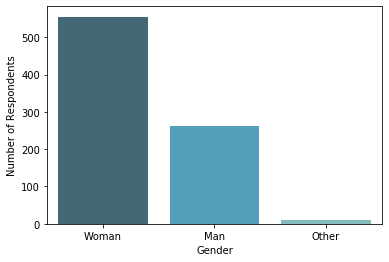

In [207]:
#figure for gender information
gender_count = demo_data['gender_l'].value_counts()
print(gender_count)

gender_plot = sns.countplot(x="gender_l", data=demo_data, palette="GnBu_d")
gender_plot.set(xlabel='Gender', ylabel='Number of Respondents')
plt.savefig('gender.png', bbox_inches='tight')
plt.show()

Masters          308
Undergraduate    302
Doctoral         203
Other              5
Advanced           2
Name: degree_l, dtype: int64


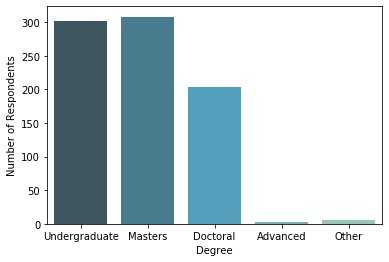

In [164]:
#figure for degree
degree_count = demo_data['degree_l'].value_counts()
print(degree_count)

degree_plot = sns.countplot(x="degree_l", data=demo_data, palette="GnBu_d", 
                            order =['Undergraduate', 'Masters', 'Doctoral', 'Advanced', 'Other'])
degree_plot.set(xlabel='Degree', ylabel='Number of Respondents')
plt.savefig('degree.png', bbox_inches='tight')
plt.show()

Family       480
Roommates    207
Alone        117
Name: living_l, dtype: int64


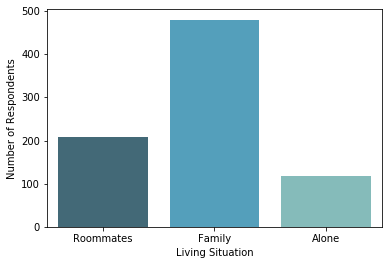

In [163]:
#figure for living
living_count = demo_data['living_l'].value_counts()
print(living_count)

living_plot = sns.countplot(x="living_l", data=demo_data, palette="GnBu_d")
living_plot.set(xlabel='Living Situation', ylabel='Number of Respondents')
plt.savefig('living.png', bbox_inches='tight')
plt.show()

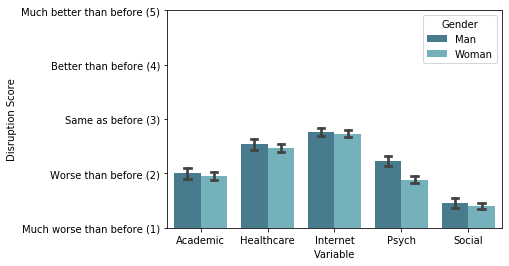

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [205]:
final_data = demo_data

h = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.gender_l != 'Unknown')]
hm = hm[(hm.gender_l != 'Other')]
hm = hm[(hm.gender_l != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'gender_l':'Gender'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Gender', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.savefig('gender_wellbeing.png', bbox_inches='tight')
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

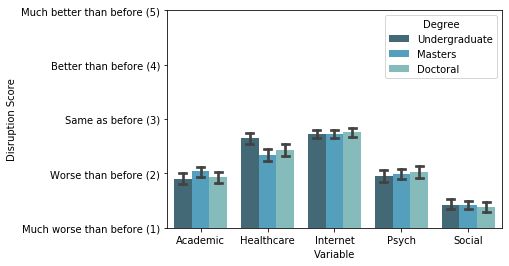

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [204]:
final_data = demo_data

h = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.degree_l != 'Unknown')]
hm = hm[(hm.degree_l != 0)]
hm = hm[(hm.degree_l != 'Advanced')]
hm = hm[(hm.degree_l != 'Other')]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'degree_l':'Degree'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Degree', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.savefig('degree_wellbeing.png', bbox_inches='tight')
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

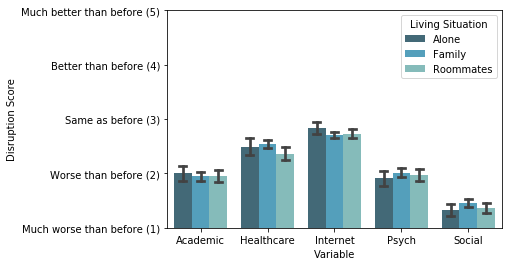

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [155]:
final_data = demo_data

h = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.living_l != 'Unknown')]
hm = hm[(hm.living_l != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'living_l':'Living Situation'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Living Situation', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.savefig('living_wellbeing.png', bbox_inches='tight')
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

# Additional Visualizations attempts

In [197]:
eda_plot_data = demo_data[['age', 'gender', 'degree', 'living', 'location',
                          'dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].copy()
eda_plot_data.head(5)                          

,age,gender,degree,living,location,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych
0,29.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
1,28.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2,28.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,30.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0
4,NaN,1.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0,2.0


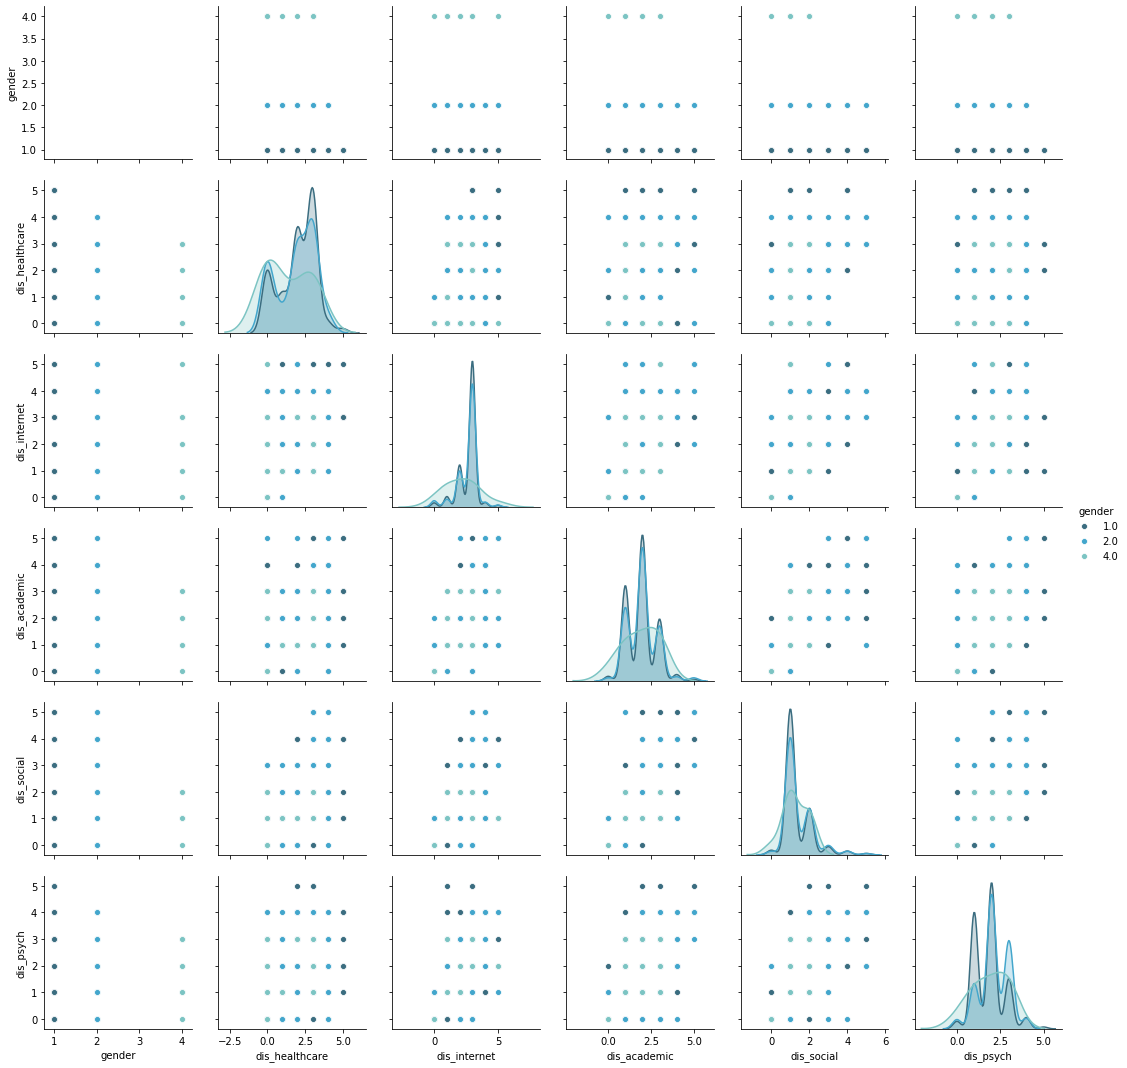

In [186]:
pair_plot_data = demo_data[['gender','dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].copy()
sns.pairplot(pair_plot_data, hue="gender", palette="GnBu_d")

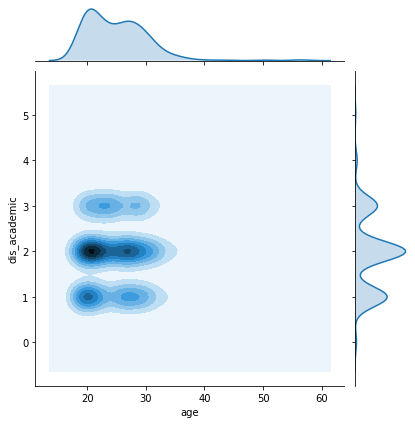

In [189]:
ax = sns.jointplot(x="age", y="dis_academic", kind='kde', data=eda_plot_data)

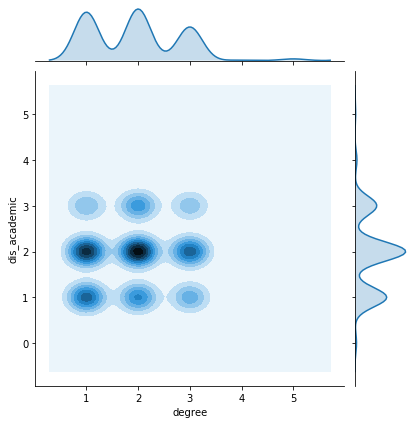

In [188]:
ax = sns.jointplot(x="degree", y="dis_academic", kind='kde', data=eda_plot_data)

Family       480
Roommates    207
Alone        117
Name: living_l, dtype: int64


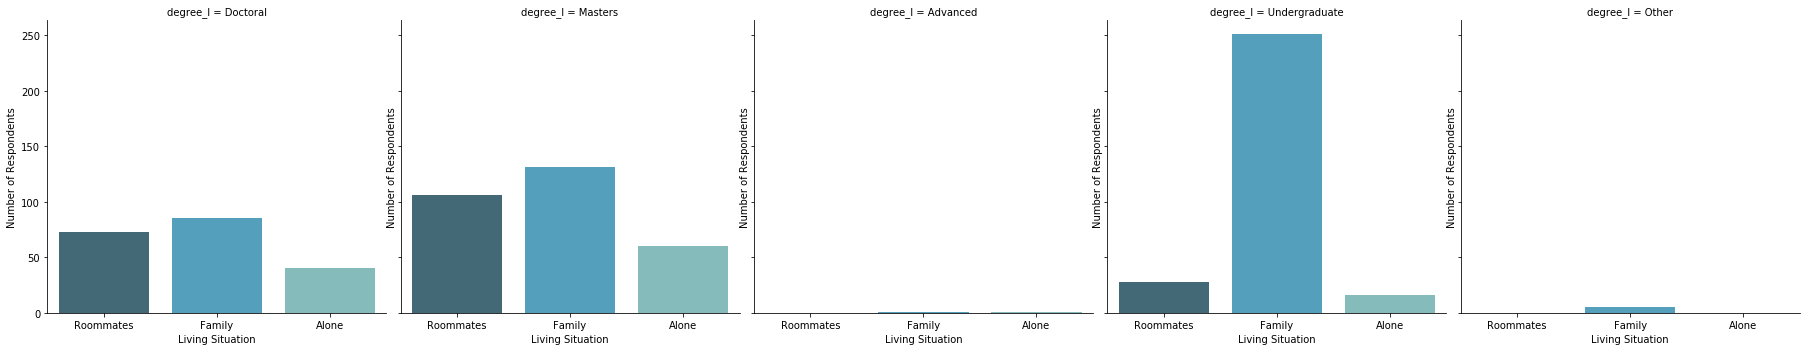

In [162]:
#figure for living and degree comparison
living_count = demo_data['living_l'].value_counts()
print(living_count)

living_plot = sns.catplot(x="living_l", data=demo_data, palette="GnBu_d",
                         col='degree_l', kind='count')
living_plot.set(xlabel='Living Situation', ylabel='Number of Respondents')
plt.savefig('living_x_degree.png', bbox_inches='tight')
plt.show()

Same City            418
Different City       303
Different Country     54
On Campus             51
Name: location_l, dtype: int64


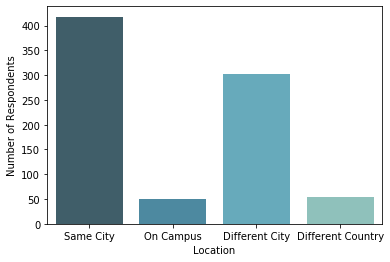

In [161]:
#figure for location
location_count = demo_data['location_l'].value_counts()
print(location_count)

location_plot = sns.countplot(x="location_l", data=demo_data, palette="GnBu_d")
location_plot.set(xlabel='Location', ylabel='Number of Respondents')
plt.savefig('location.png', bbox_inches='tight')
plt.show()

Same City            418
Different City       303
Different Country     54
On Campus             51
Name: location_l, dtype: int64


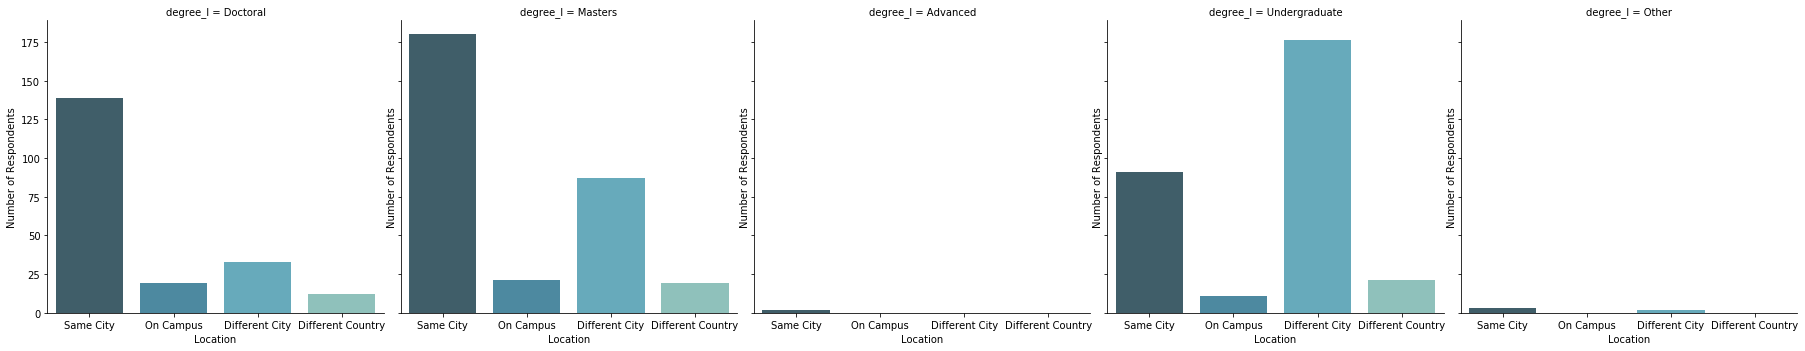

In [160]:
#figure for location by degree
location_count = demo_data['location_l'].value_counts()
print(location_count)

location_plot = sns.catplot(x="location_l", data=demo_data, palette="GnBu_d",
                               col="degree_l", kind="count")
location_plot.set(xlabel='Location', ylabel='Number of Respondents')
plt.savefig('location_x_degree.png', bbox_inches='tight')
plt.show()

No     728
Yes    100
Name: vulnerable_l, dtype: int64


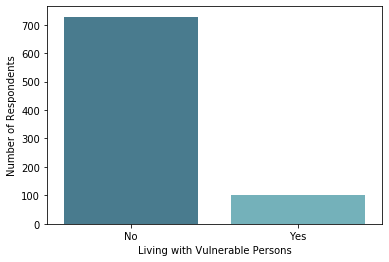

In [159]:
#figure for vulnerable
vulnerable_count = demo_data['vulnerable_l'].value_counts()
print(vulnerable_count)

vulnerable_plot = sns.countplot(x="vulnerable_l", data=demo_data, palette="GnBu_d")
vulnerable_plot.set(xlabel='Living with Vulnerable Persons', ylabel='Number of Respondents')
plt.savefig('vulnerable.png', bbox_inches='tight')
plt.show()

No     728
Yes    100
Name: vulnerable_l, dtype: int64


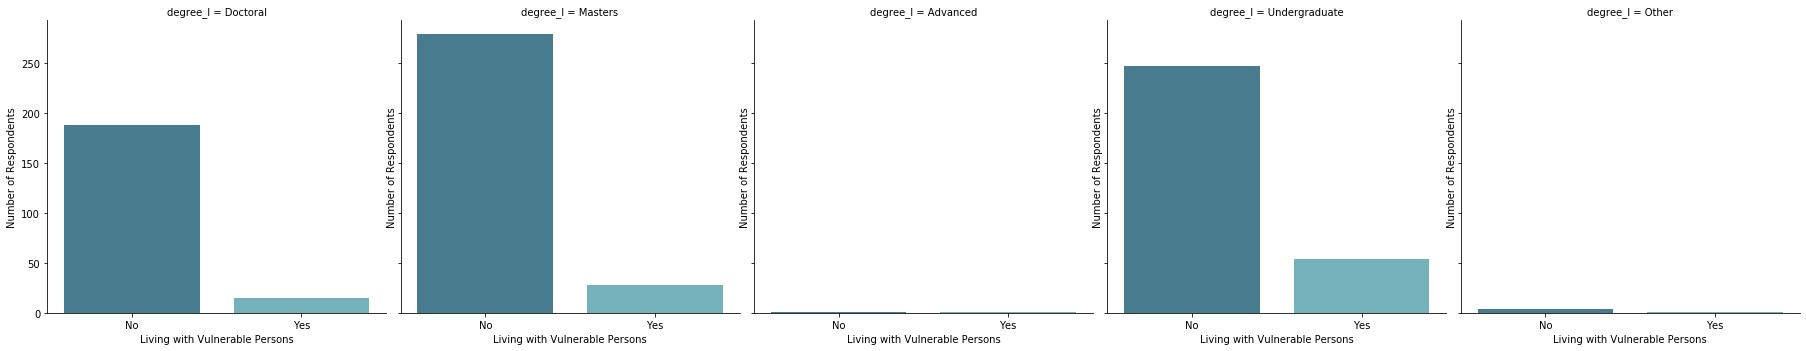

In [158]:
#figure for living with vulnerable people by degree
vulnerable_count = demo_data['vulnerable_l'].value_counts()
print(vulnerable_count)

vulnerable_plot = sns.catplot(x="vulnerable_l", data=demo_data, palette="GnBu_d",
                               col="degree_l", kind="count")

vulnerable_plot.set(xlabel='Living with Vulnerable Persons', ylabel='Number of Respondents')
plt.savefig('vulnerable_x_degree.png', bbox_inches='tight')
plt.show()